In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    abs_sobel =  np.sqrt(abs_sobelx**2+abs_sobely**2)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output [(scaled_sobel >= mag_thresh[0]) & (scaled_sobel<=mag_thresh[1])] =1
    return binary_output

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    else:
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # Return the result
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_sobel =  np.arctan2(abs_sobely,abs_sobelx)
    binary_output = np.zeros_like(dir_sobel)
    binary_output [(dir_sobel >= thresh[0]) & (dir_sobel<=thresh[1])] =1
    return binary_output

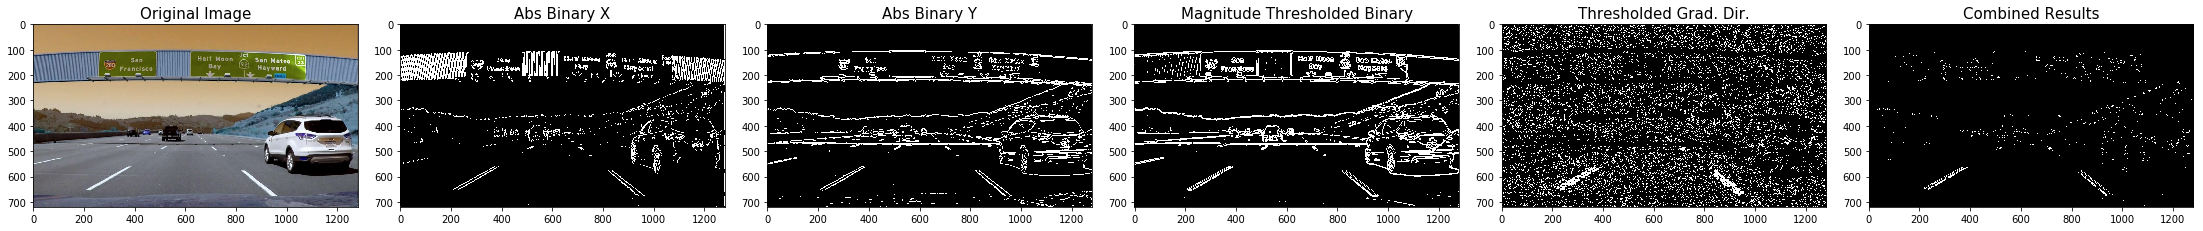

In [62]:
image= cv2.imread('./signs_vehicles_xygrad.jpg')
abs_binaryX= abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=120)
abs_binaryY= abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=120)
mag_binary=mag_thresh(image, sobel_kernel=11, mag_thresh=(30, 110))
dir_binary =dir_threshold(image, sobel_kernel=31, thresh=(0.85, 1.1))
comb_binary = np.zeros_like(dir_binary)
comb_binary[((mag_binary==1)&(dir_binary==1))]=1

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(30, 15))
f.tight_layout()
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(abs_binaryX, cmap='gray')
ax2.set_title('Abs Binary X', fontsize=15)
ax3.imshow(abs_binaryY, cmap='gray')
ax3.set_title('Abs Binary Y', fontsize=15)
ax4.imshow(mag_binary, cmap='gray')
ax4.set_title('Magnitude Thresholded Binary', fontsize=15)
ax5.imshow(dir_binary, cmap='gray')
ax5.set_title('Thresholded Grad. Dir.', fontsize=15)
ax6.imshow(comb_binary, cmap='gray')
ax6.set_title('Combined Results', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)